In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from tqdm import tqdm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy import stats

import sys
sys.path.append('./src')

import simulation as sim
import constant as ct
from PoissonNeuron import PoissonNeuron


# 1.1

100%|██████████| 9999/9999 [00:00<00:00, 17160.66it/s]


Mean spikes per time interval: 0.12329666666666667


100%|██████████| 9999/9999 [00:00<00:00, 16135.74it/s]


Mean spikes per time interval: 0.12233666666666666


100%|██████████| 9999/9999 [00:00<00:00, 17591.60it/s]


Mean spikes per time interval: 0.12414


100%|██████████| 9999/9999 [00:00<00:00, 17158.76it/s]


Mean spikes per time interval: 0.34581


100%|██████████| 9999/9999 [00:00<00:00, 16289.83it/s]


Mean spikes per time interval: 0.35599333333333333


100%|██████████| 9999/9999 [00:00<00:00, 17597.98it/s]


Mean spikes per time interval: 0.37239333333333335


100%|██████████| 9999/9999 [00:00<00:00, 19136.57it/s]


Mean spikes per time interval: 0.3778


100%|██████████| 9999/9999 [00:00<00:00, 18934.72it/s]


Mean spikes per time interval: 0.39110666666666666


100%|██████████| 9999/9999 [00:00<00:00, 16900.41it/s]


Mean spikes per time interval: 0.39660666666666666


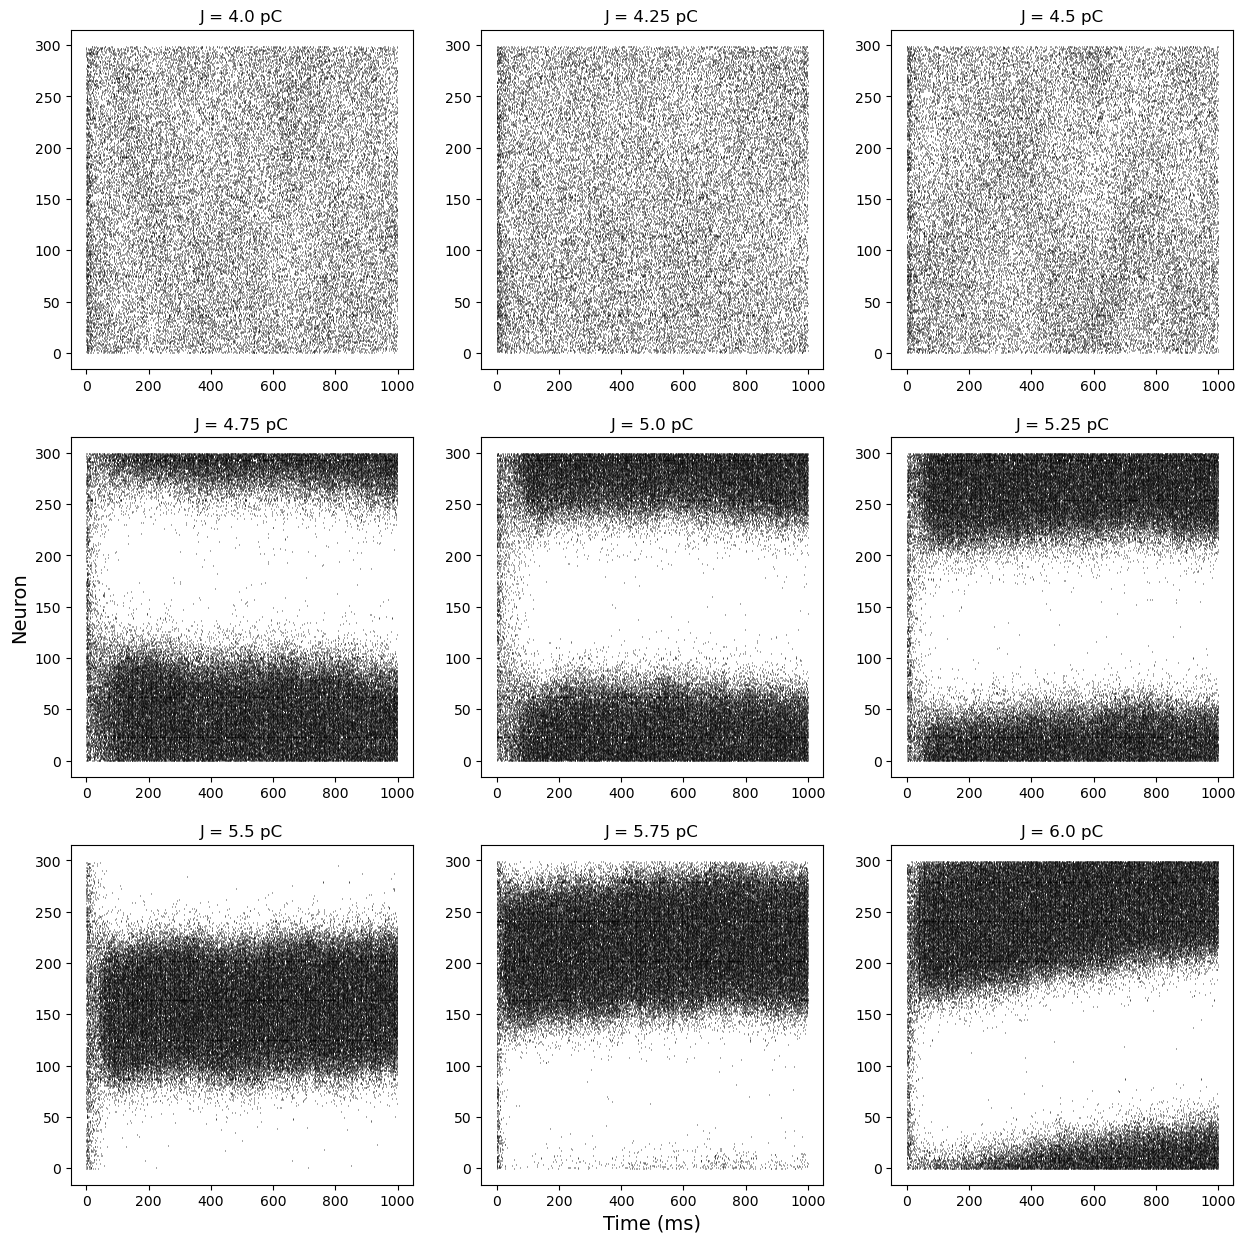

In [2]:
J_values = np.linspace(4, 6, 9)

fig, ax = plt.subplots(3, 3, figsize=(15, 15))
ax[2, 1].set_xlabel('Time (ms)', fontsize=14)
ax[1, 0].set_ylabel('Neuron', fontsize=14)


for i, J in enumerate(J_values):
    x, y = i//3, i%3
    network = PoissonNeuron(J=J)
    h,s = network.spike_simulation(input_fct=network.recurrent_interactions_input, initial_voltage=np.random.uniform(0, 1, ct.N))
    
    s = sim.bins_spike(s, 1)
    print('Mean spikes per time interval:', np.mean(s))
    spike_times = [np.where(s.T[i] !=0)[0] for i in range(ct.N)]
    ax[x, y].eventplot(spike_times, orientation='horizontal', linewidths=0.5, color='black')
    ax[x, y].set_title(f'J = {J} pC')

#plt.tight_layout()
#plt.savefig('./plots/1_1.png', dpi=600)
plt.show()

100%|██████████| 9999/9999 [00:00<00:00, 18104.78it/s]


Mean spikes per time interval: 0.12845333333333334


100%|██████████| 9999/9999 [00:00<00:00, 19474.13it/s]


Mean spikes per time interval: 0.32786666666666664


100%|██████████| 9999/9999 [00:00<00:00, 18737.99it/s]


Mean spikes per time interval: 0.36193333333333333


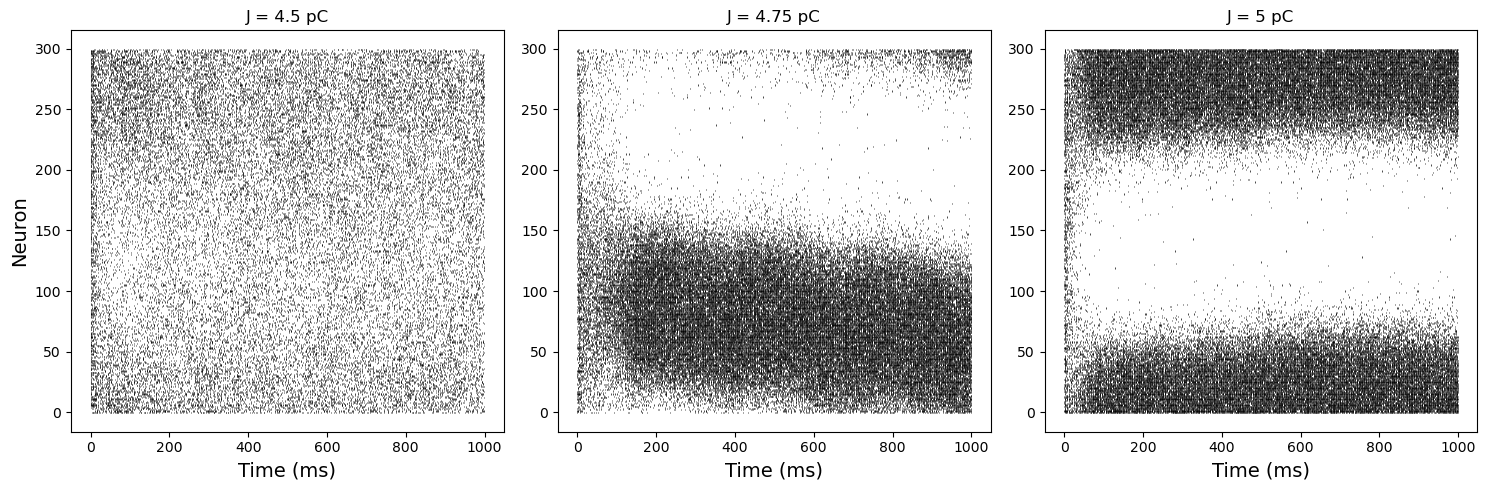

In [6]:
J_values = [4.5, 4.75, 5]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].set_ylabel('Neuron', fontsize=14)


for i, J in enumerate(J_values):
    network = PoissonNeuron(J=J)
    h,s = network.spike_simulation(input_fct=network.recurrent_interactions_input, initial_voltage=np.random.uniform(0, 1, ct.N))
    
    s = sim.bins_spike(s, 1)
    print('Mean spikes per time interval:', np.mean(s))
    spike_times = [np.where(s.T[i] !=0)[0] for i in range(ct.N)]
    ax[i].eventplot(spike_times, orientation='horizontal', linewidths=0.5, color='black')
    ax[i].set_title(f'J = {J} pC')
    ax[i].set_xlabel('Time (ms)', fontsize=14)

plt.tight_layout()
plt.savefig('./plots/1_1.png', dpi=600)
plt.show()

A jump is visible for J bigger than 4.75 pC

# 1.2

In [5]:
J = 5
network = PoissonNeuron(J=J)
h,s = network.spike_simulation(input_fct=network.recurrent_interactions_input, initial_voltage=np.random.uniform(0, 1, ct.N))
s1 = sim.bins_spike(s, 1)
s10 = sim.bins_spike(s, 10)

100%|██████████| 9999/9999 [00:00<00:00, 15850.40it/s]


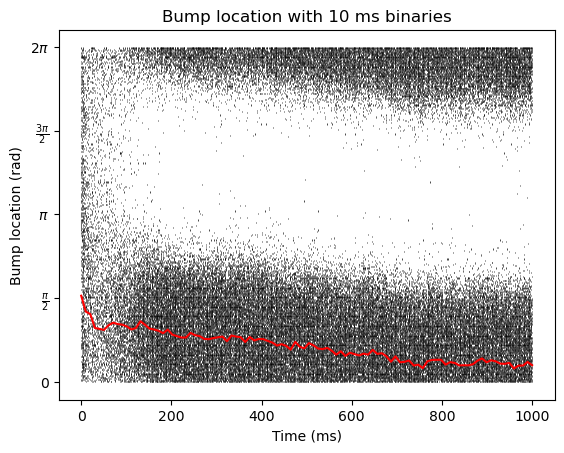

In [6]:
bump_location = sim.get_bump(s10, N = ct.N)
spike_times = [np.where(s1.T[i] !=0)[0] for i in range(ct.N)]
plt.eventplot(spike_times, orientation='horizontal', linewidths=0.5, color='black')
plt.plot(np.linspace(0, 1000, len(bump_location), endpoint=True), ct.N*np.array(bump_location)/(2*np.pi), color='red') # with 10 ms binaries
plt.title('Bump location with 10 ms binaries')
plt.xlabel('Time (ms)')
plt.ylabel('Bump location (rad)')
plt.yticks(np.linspace(0,ct.N,5, endpoint=True), ['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])

plt.tight_layout()
#plt.savefig('./plots/1_2.png', dpi=600)
plt.show()


In [3]:
mad = []

for i in tqdm(range(100)): 
    network = PoissonNeuron()

    h,s = network.spike_simulation(input_fct=network.recurrent_interactions_input, initial_voltage=np.random.uniform(0, 1, ct.N))
    s1 = sim.bins_spike(s, 1)
    s10 = sim.bins_spike(s, 10)

    bump_location = sim.get_bump(s10, N = ct.N)
    mad.append(stats.median_abs_deviation(bump_location))

100%|██████████| 100/100 [01:50<00:00,  1.11s/it]


In [6]:
print(f'mean MAD: {np.mean(mad)} +- {np.std(mad)}')

mean MAD: 0.09926001472190586 +- 0.05336314143460752


# 1.3

In [54]:
N = 300
delta_t = 1
tau = 10
network = PoissonNeuron(N=N, J=J, tau=tau, delta_t=delta_t)
h,s = network.spike_simulation(input_fct=network.recurrent_interactions_input, initial_voltage=np.random.uniform(0, 1, N))
s1 = sim.bins_spike(s, 1, delta_t=delta_t, N=N)
s10 = sim.bins_spike(s, 10, delta_t=delta_t, N=N)

100%|██████████| 999/999 [00:00<00:00, 14187.31it/s]


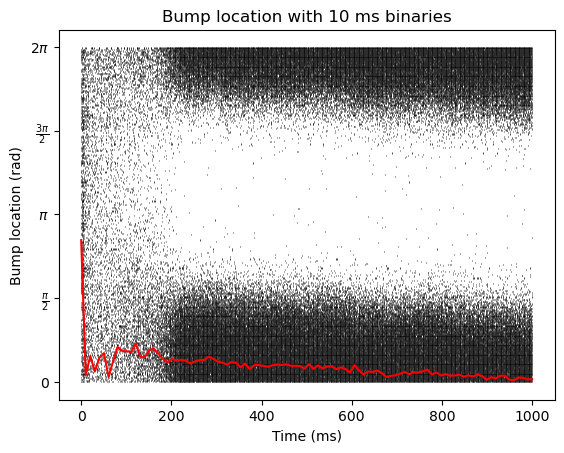

In [55]:
bump_location = sim.get_bump(s10, N = N)
spike_times = [np.where(s1.T[i] !=0)[0] for i in range(N)]
plt.eventplot(spike_times, orientation='horizontal', linewidths=0.5, color='black')
plt.plot(np.linspace(0, 1000, len(bump_location), endpoint=True), N*np.array(bump_location)/(2*np.pi), color='red')
plt.title('Bump location with 10 ms binaries')
plt.xlabel('Time (ms)') # with 10 ms binaries
plt.ylabel('Bump location (rad)')
plt.yticks(np.linspace(0,N,5, endpoint=True), ['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
plt.show()

100%|██████████| 9999/9999 [00:09<00:00, 1058.30it/s]


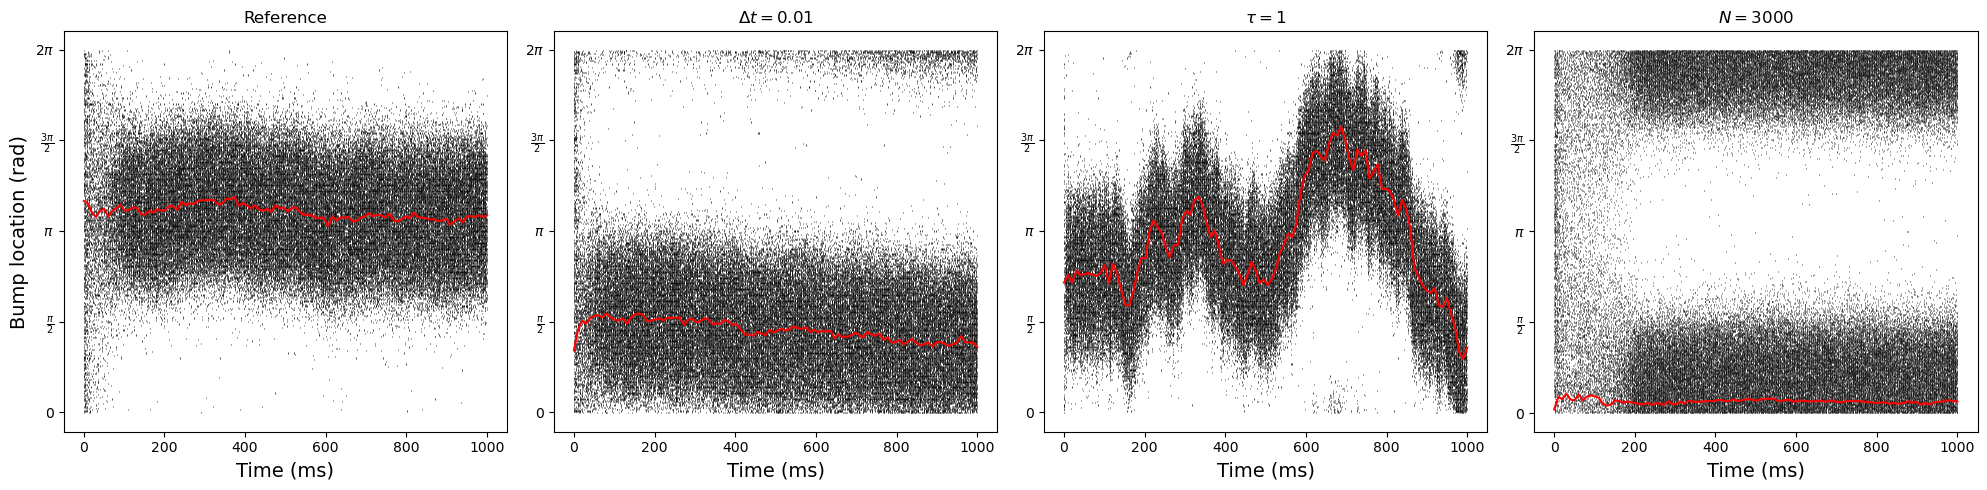

In [43]:
N_vals = [300, 300, 300, 3000]
delta_t_vals = [0.1, 0.01, 0.1, 0.1]
tau_vals = [10, 10, 1, 10]
bins = [1, 10, 1, 1]
titles = ['Reference', r'$\Delta t=0.01$', r'$\tau=1$', r'$N=3000$']

fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].set_ylabel('Bump location (rad)', fontsize=14)


for i in range(len(N_vals)):
    network = PoissonNeuron(N=N_vals[i], delta_t=delta_t_vals[i], tau=tau_vals[i])
    h,s = network.spike_simulation(input_fct=network.recurrent_interactions_input, initial_voltage=np.random.uniform(0, 1, N_vals[i]))
    
    s_one = sim.bins_spike(s, bins[i], N=N_vals[i])
    s_bump = sim.bins_spike(s, 10*bins[i], N=N_vals[i])
    bump_location = sim.get_bump(s_bump, N = N_vals[i])
    spike_times = [np.where(s_one.T[i] !=0)[0] for i in range(N_vals[i])]

    ax[i].eventplot(spike_times, orientation='horizontal', linewidths=0.5, color='black')
    ax[i].set_title(titles[i])
    ax[i].set_xlabel('Time (ms)', fontsize=14)
    ax[i].set_yticks(np.linspace(0,N_vals[i],5, endpoint=True), ['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
    ax[i].plot(np.linspace(0, 1000, len(bump_location), endpoint=True), N_vals[i]*np.array(bump_location)/(2*np.pi), color='red') # with 10 ms binaries

plt.tight_layout()
#plt.savefig('./plots/1_3.png', dpi=600)
plt.show()

# 1.4

100%|██████████| 9999/9999 [00:00<00:00, 16932.36it/s]


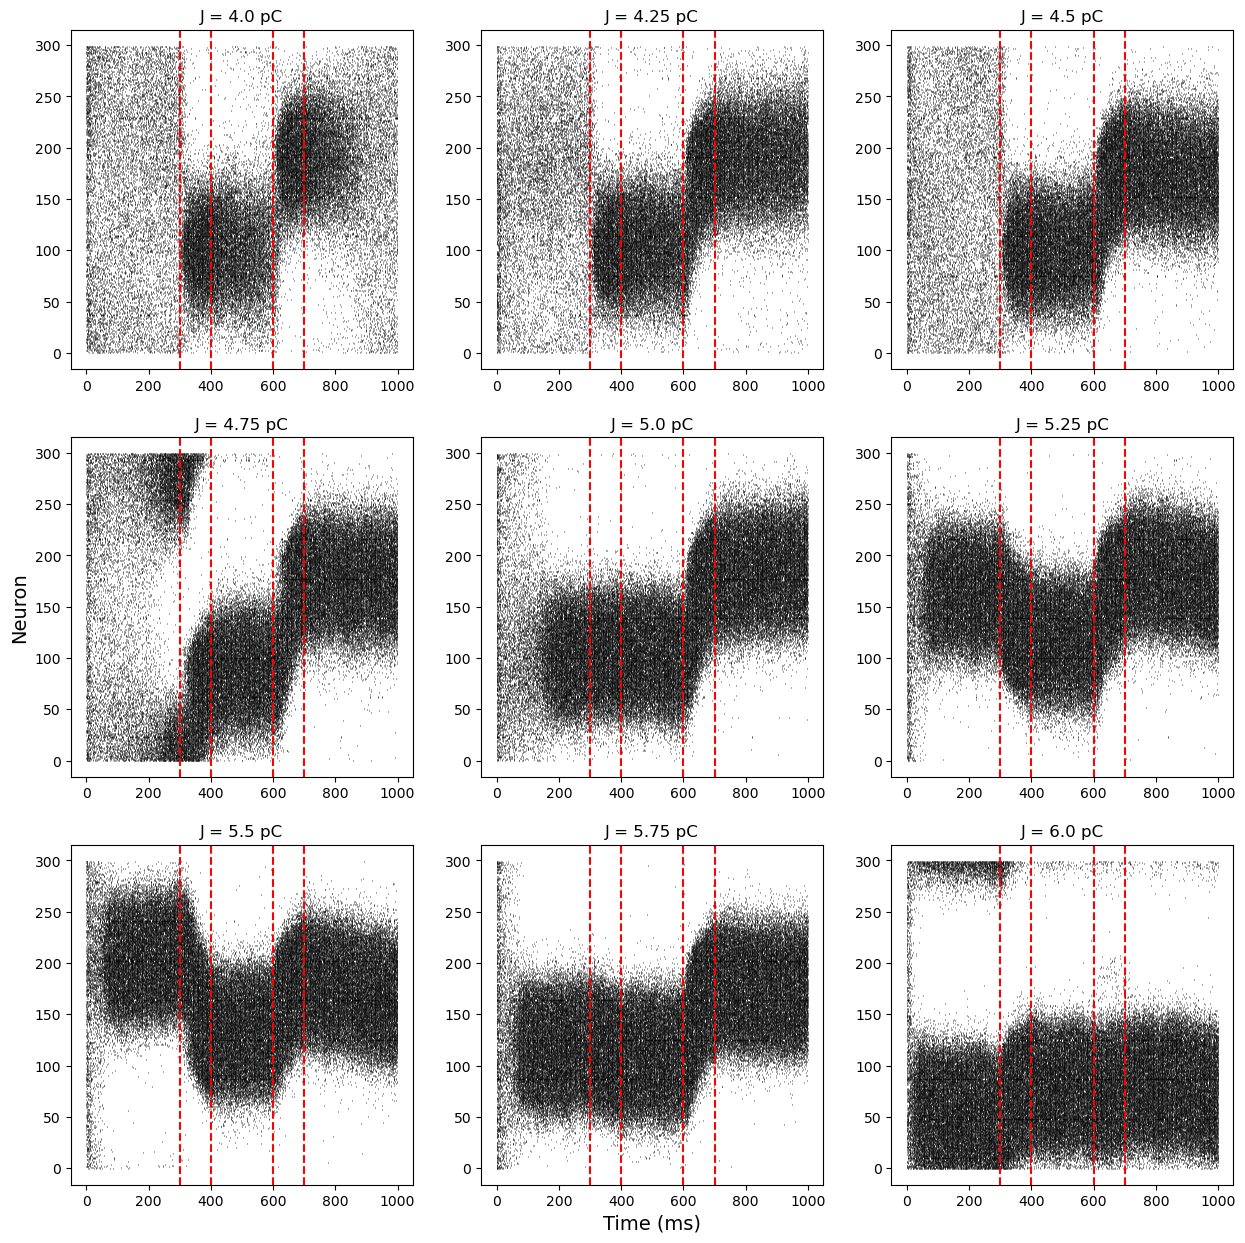

In [9]:
J_values = np.linspace(4, 6, 9)

fig, ax = plt.subplots(3, 3, figsize=(15, 15))
ax[2, 1].set_xlabel('Time (ms)', fontsize=14)
ax[1, 0].set_ylabel('Neuron', fontsize=14)

for i, J in enumerate(J_values):
    x1, y1 = i//3, i%3

    network = PoissonNeuron(J=J, I_ext=True) # with external input
    _, spike_ext_current = network.spike_simulation(input_fct=network.recurrent_interactions_input, initial_voltage=np.random.uniform(0, 1, ct.N))
    
    spike_ext_current = sim.bins_spike(spike_ext_current, 1)
    spike_times = [np.where(spike_ext_current.T[i] !=0)[0] for i in range(ct.N)]
    ax[x1, y1].eventplot(spike_times, orientation='horizontal', color="black", linewidth=0.5)
    [ax[x1, y1].axvline(x=x, color='red', linestyle='--') for x in [300, 400,600,700]]
    ax[x1, y1].set_title(f'J = {J} pC')
plt.show()    

  0%|          | 0/9999 [00:00<?, ?it/s]

100%|██████████| 9999/9999 [00:00<00:00, 16823.62it/s]


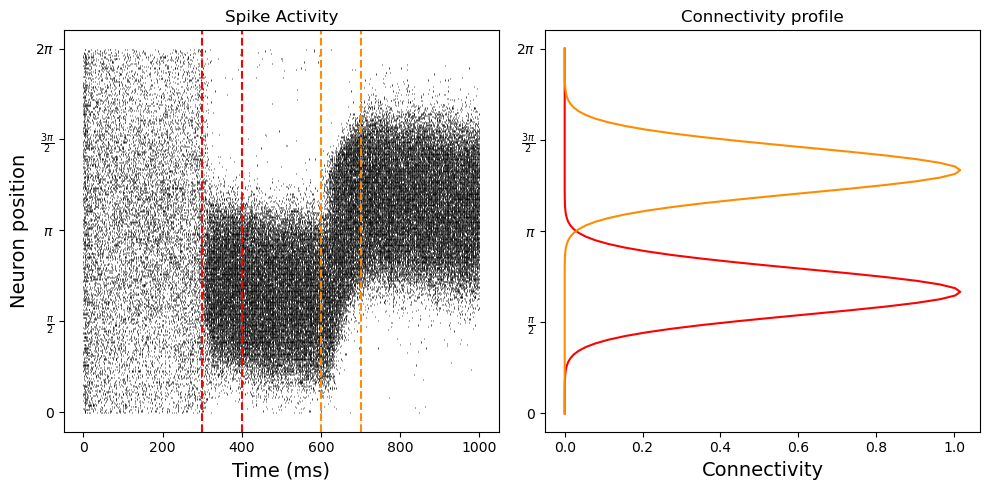

In [98]:
# BUMP LOCATION
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].set_xlabel('Time (ms)', fontsize=14)
ax[0].set_ylabel('Neuron position', fontsize=14)
ax[0].set_yticks(np.linspace(0,ct.N,5, endpoint=True), ['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])

network = PoissonNeuron(I_ext=True) # with external input
_, spike_ext_current = network.spike_simulation(input_fct=network.recurrent_interactions_input, initial_voltage=np.random.uniform(0, 1, ct.N))

spike_ext_current = sim.bins_spike(spike_ext_current, 1)
spike_times = [np.where(spike_ext_current.T[i] !=0)[0] for i in range(ct.N)]
ax[0].eventplot(spike_times, orientation='horizontal', color="black", linewidth=0.5)
[ax[0].axvline(x=x, color='red', linestyle='--') for x in [300, 400]]
[ax[0].axvline(x=x, color='darkorange', linestyle='--') for x in [600,700]]
ax[0].set_title('Spike Activity')

# CONNECTIVITY PROFILE
mu_1, mu_2, sigma = 2*np.pi/3, 4*np.pi/3, np.pi/8
x = np.linspace(0, 2*np.pi, 100)
w_1 = 1/(np.sqrt(2*np.pi)*sigma) * np.exp(-((x-mu_1)**2/(2*sigma**2)))
w_2 = 1/(np.sqrt(2*np.pi)*sigma) * np.exp(-((x-mu_2)**2/(2*sigma**2)))

ax[1].plot(w_1, x, color='red')
ax[1].plot(w_2, x, color='darkorange')
ax[1].set_xlabel('Connectivity', fontsize=14)
ax[1].set_title('Connectivity profile')
ax[1].set_yticks(np.linspace(0,2*np.pi,5, endpoint=True), ['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])

plt.tight_layout()
#plt.savefig('./plots/1_4.png', dpi=600)
plt.show()


# 1.5

The connectivity can be expressed as 
$$w(x_i, x_j)=\cos{(x_i-x_j)}=\cos{(x_i)}\cos{(x_j)}+\sin{(x_i)}\sin{(x_j)}$$
Adding the phase term $\varphi$, we obtain
$$w(x_i-\varphi, x_j)=\cos{(x_i-\varphi-x_j)}=\cos{(x_i-\varphi)}\cos{(x_j)}+\sin{(x_i-\varphi)}\sin{(x_j)}$$
which substituted in the recurrent input (with no external input) gives
\begin{align*}
    I_i(t)&=\frac{J}{N}\sum_{j=1}^N w(x_i-\varphi, x_j) S_j(t)=\frac{J}{N}\sum_{j=1}^N \left( \cos{(x_i-\varphi)}\cos{(x_j)}+\sin{(x_i-\varphi)}\sin{(x_j)}\right) S_j(t) \\
    &= J (\cos{(x_i-\varphi)} m_{\cos} (t) + \sin{(x_i-\varphi)} m_{\sin} (t))
\end{align*}
with $m_{\cos} (t)=\frac{1}{N}\sum_{j=1}^N \cos{(x_j)} S_j(t)$ and $m_{\sin} (t)=\frac{1}{N}\sum_{j=1}^N \sin{(x_j)} S_j(t)$

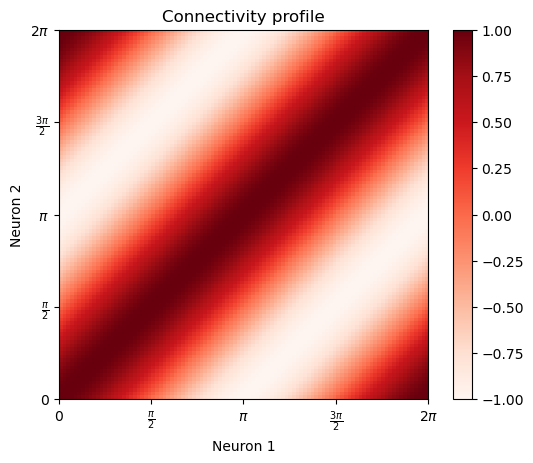

In [128]:
# connectivity profile
phase = 0
x = np.linspace(0, 2*np.pi, 100).reshape(-1, 1)
w = np.cos(x-phase-x.T)

plt.imshow(w, cmap='Reds', extent=[0, 2*np.pi, 0, 2*np.pi], origin='lower', vmin=-1, vmax=1)
plt.xlabel('Neuron 1')
plt.ylabel('Neuron 2')
plt.title('Connectivity profile')
plt.xticks(np.linspace(0,2*np.pi,5, endpoint=True), ['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
plt.yticks(np.linspace(0,2*np.pi,5, endpoint=True), ['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
plt.colorbar()
plt.show()

Attract neuron at proximity and inhibit neurons far away

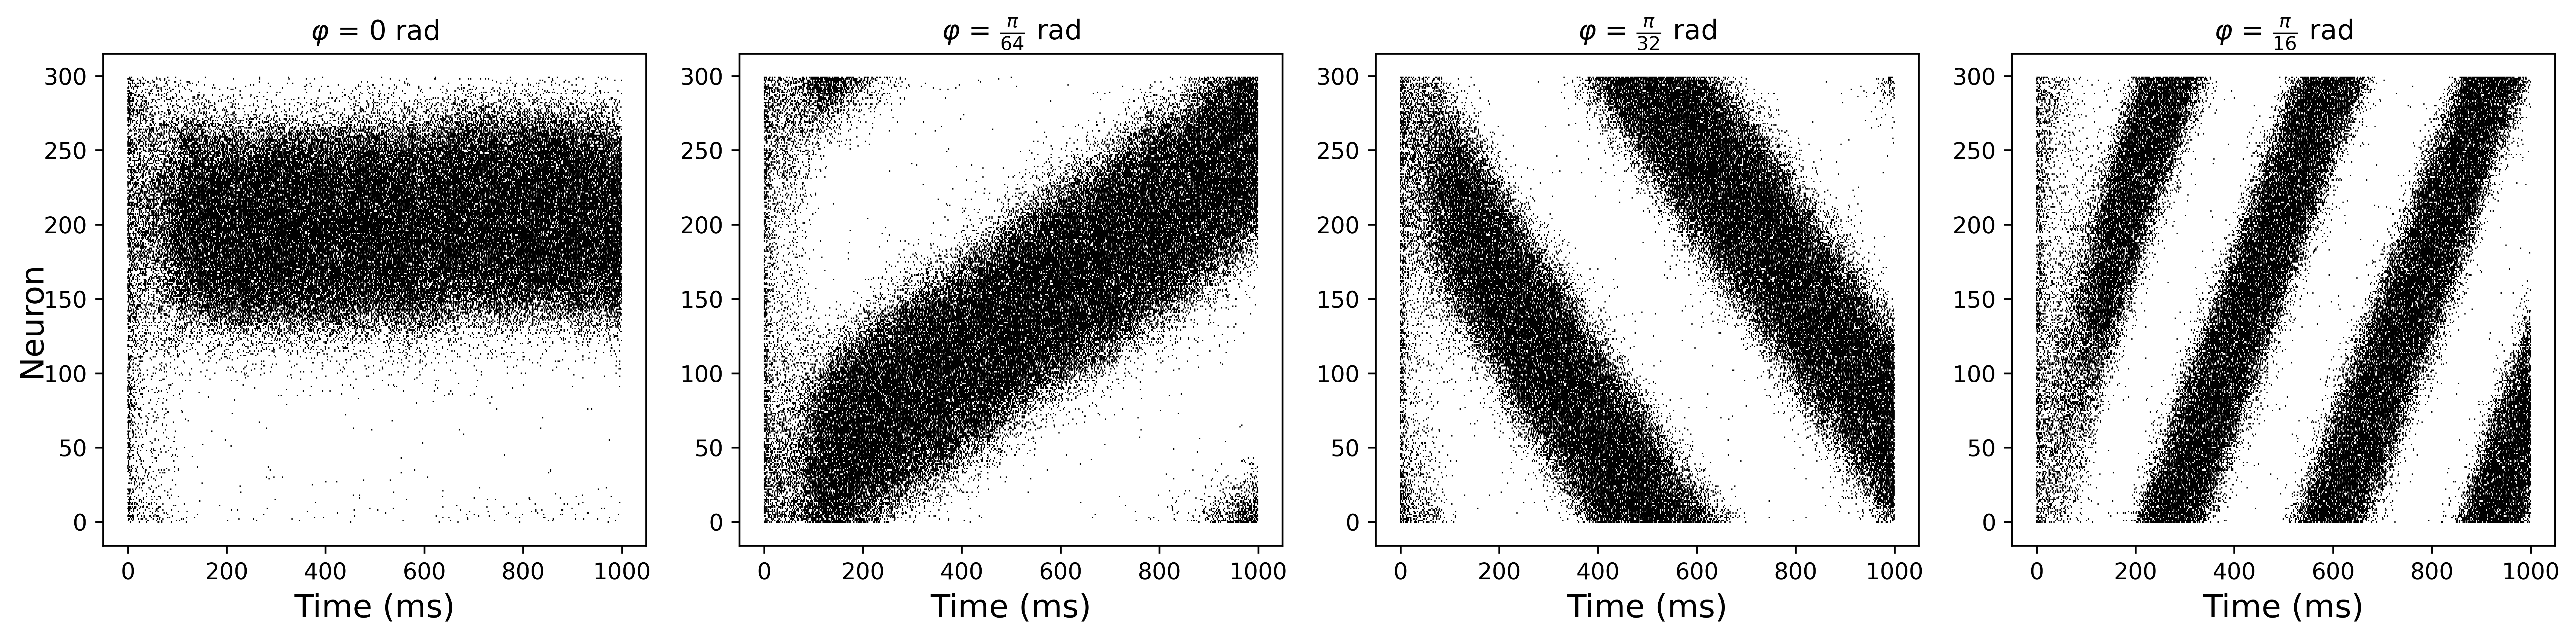

In [7]:
phi_values = [0, np.pi/64, -np.pi/32, np.pi/16]
string_phi = ['0', r'$\frac{\pi}{64}$', r'$-\frac{\pi}{32}$', r'$\frac{\pi}{16}$']

fig, ax = plt.subplots(1, 4, figsize=(16, 4), dpi=600)
fig.supylabel('Neuron', fontsize=14)

for i, phi in enumerate(phi_values):
    network = PoissonNeuron(phi=phi)
    h,s = network.spike_simulation(input_fct=network.recurrent_interactions_input, initial_voltage=np.random.uniform(0, 1, ct.N))
    
    s = sim.bins_spike(s, 1)
    spike_times = [np.where(s.T[i] !=0)[0] for i in range(ct.N)]
    ax[i].eventplot(spike_times, orientation='horizontal', color="black", linewidth=0.5)
    ax[i].set_title(r'$\varphi$ = ' + string_phi[i] + ' rad')
    ax[i].set_xlabel('Time (ms)', fontsize=14)

    
plt.tight_layout()
#plt.savefig('./plots/1_5.png', dpi=600)
plt.show()
    

With the original connectivity $( w(x_i, x_j))$, the network generates a bump pattern that is symmetric.

However, when the connectivity is given by $( w(x_i - \varphi, x_j))$, a phase shift occurs in the connectivity pattern. This means that the activity bump will also exhibit a phase shift by an amount equal to $( \varphi )$. We can expect a shift in the behavior of the bump due to this phase difference. 

## 1.6

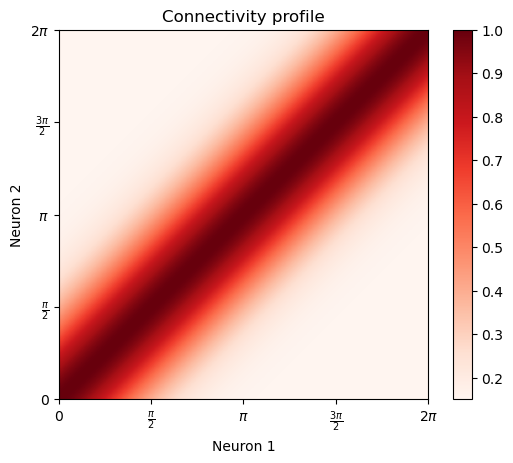

In [46]:
x = np.linspace(0, 2*np.pi, 300).reshape(-1, 1)
J0, J1, sigma = 0.15, 0.85, 1
gaussian = J0 + J1 * np.exp((-(x-x.T)**2)/(2*sigma**2))

plt.imshow(gaussian, cmap='Reds', extent=[0, 2*np.pi, 0, 2*np.pi], origin='lower')
plt.xlabel('Neuron 1')
plt.ylabel('Neuron 2')
plt.title('Connectivity profile')
plt.xticks(np.linspace(0,2*np.pi,5, endpoint=True), ['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
plt.yticks(np.linspace(0,2*np.pi,5, endpoint=True), ['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
plt.colorbar()

J0 = -1.00, J1 = 3, sigma = 1.00


100%|██████████| 9999/9999 [00:01<00:00, 6345.06it/s]


Mean spikes per time interval: 0.49617666666666665
J0 = -1.00, J1 = 3, sigma = 1.00


100%|██████████| 9999/9999 [00:01<00:00, 6508.42it/s]


Mean spikes per time interval: 0.4914633333333333
J0 = -1.00, J1 = 3, sigma = 1.00


100%|██████████| 9999/9999 [00:01<00:00, 5444.38it/s]


Mean spikes per time interval: 0.4898866666666667
J0 = -1.00, J1 = 3, sigma = 1.00


100%|██████████| 9999/9999 [00:02<00:00, 4989.16it/s]


Mean spikes per time interval: 0.49416666666666664
J0 = -1.00, J1 = 3, sigma = 1.00


100%|██████████| 9999/9999 [00:01<00:00, 5942.79it/s]


Mean spikes per time interval: 0.4935833333333333
J0 = -1.00, J1 = 3, sigma = 1.00


100%|██████████| 9999/9999 [00:01<00:00, 5971.75it/s]


Mean spikes per time interval: 0.4965833333333333
J0 = -1.00, J1 = 3, sigma = 1.00


100%|██████████| 9999/9999 [00:01<00:00, 5831.72it/s]


Mean spikes per time interval: 0.49388
J0 = -1.00, J1 = 3, sigma = 1.00


100%|██████████| 9999/9999 [00:01<00:00, 5639.94it/s]


Mean spikes per time interval: 0.49171
J0 = -1.00, J1 = 3, sigma = 1.00


100%|██████████| 9999/9999 [00:01<00:00, 6350.84it/s]


Mean spikes per time interval: 0.49158


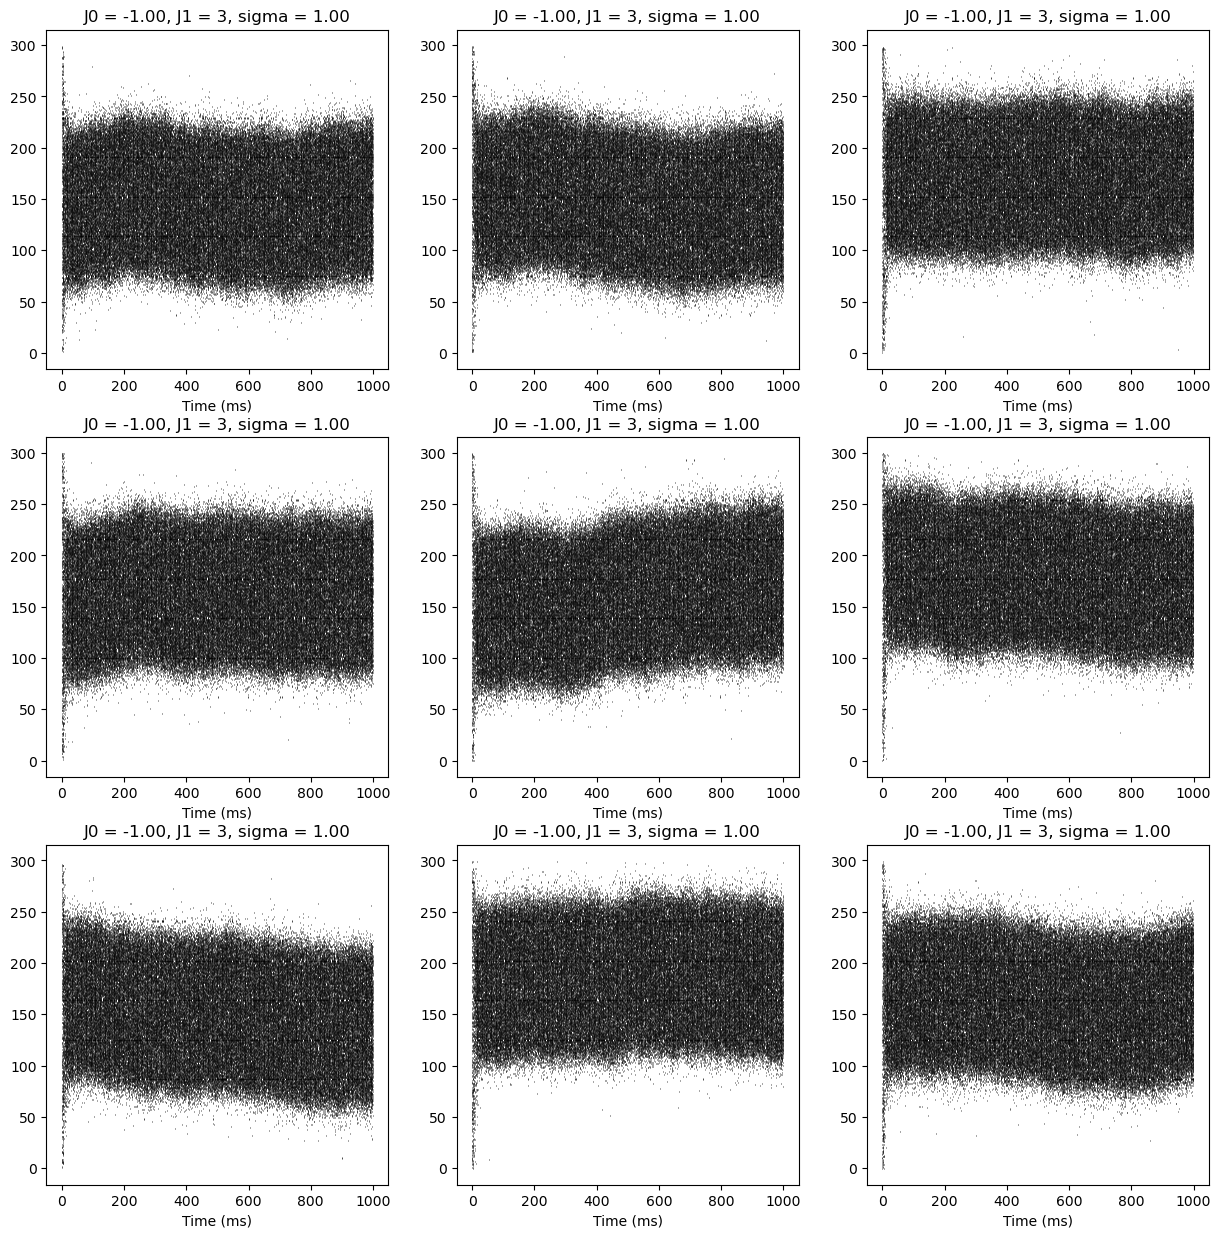

In [44]:
J1_values = [3, 3, 3]
sigma_values = [1, 1, 1]

fig, ax = plt.subplots(len(sigma_values), len(J1_values), figsize=(15, 15))

for i, sigma_w in enumerate(sigma_values):
    for j, J1 in enumerate(J1_values):
        J0 =  -1
        print(f'J0 = {J0:.2f}, J1 = {J1}, sigma = {sigma_w:.2f}')
        network = PoissonNeuron(J0=J0, J1=J1, sigma_w=sigma_w)
        h,s = network.spike_simulation(input_fct=network.line_input, initial_voltage=np.random.uniform(0, 1, ct.N))
        
        s = sim.bins_spike(s, 1)
        print('Mean spikes per time interval:', np.mean(s))
        spike_times = [np.where(s.T[i] !=0)[0] for i in range(ct.N)]
        ax[i,j].eventplot(spike_times, orientation='horizontal', color="black", linewidth=0.5)
        ax[i,j].set_title(f'J0 = {J0:.2f}, J1 = {J1}, sigma = {sigma_w:.2f}')
        ax[i,j].set_xlabel('Time (ms)')

plt.show()

The bump is only around the middle neurons, not anymore at all possible angles.

#### Impact of phase

  0%|          | 0/9999 [00:00<?, ?it/s]

100%|██████████| 9999/9999 [00:01<00:00, 6327.81it/s]


Mean spikes per time interval: 0.49723666666666666


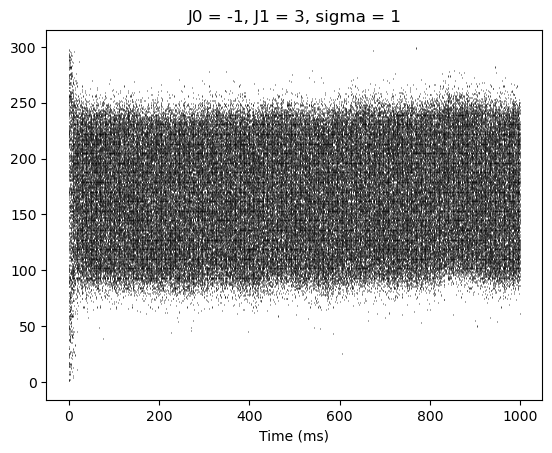

In [54]:
network = PoissonNeuron(J0=-1, J1=3, sigma_w=1, phi=2*np.pi)
h,s = network.spike_simulation(input_fct=network.line_input, initial_voltage=np.random.uniform(0, 1, ct.N))

s = sim.bins_spike(s, 1)
print('Mean spikes per time interval:', np.mean(s))
spike_times = [np.where(s.T[i] !=0)[0] for i in range(ct.N)]
plt.eventplot(spike_times, orientation='horizontal', color="black", linewidth=0.5)
plt.title(f'J0 = {-1}, J1 = {3}, sigma = {1}')
plt.xlabel('Time (ms)')
plt.show()

100%|██████████| 9999/9999 [00:01<00:00, 6060.80it/s]


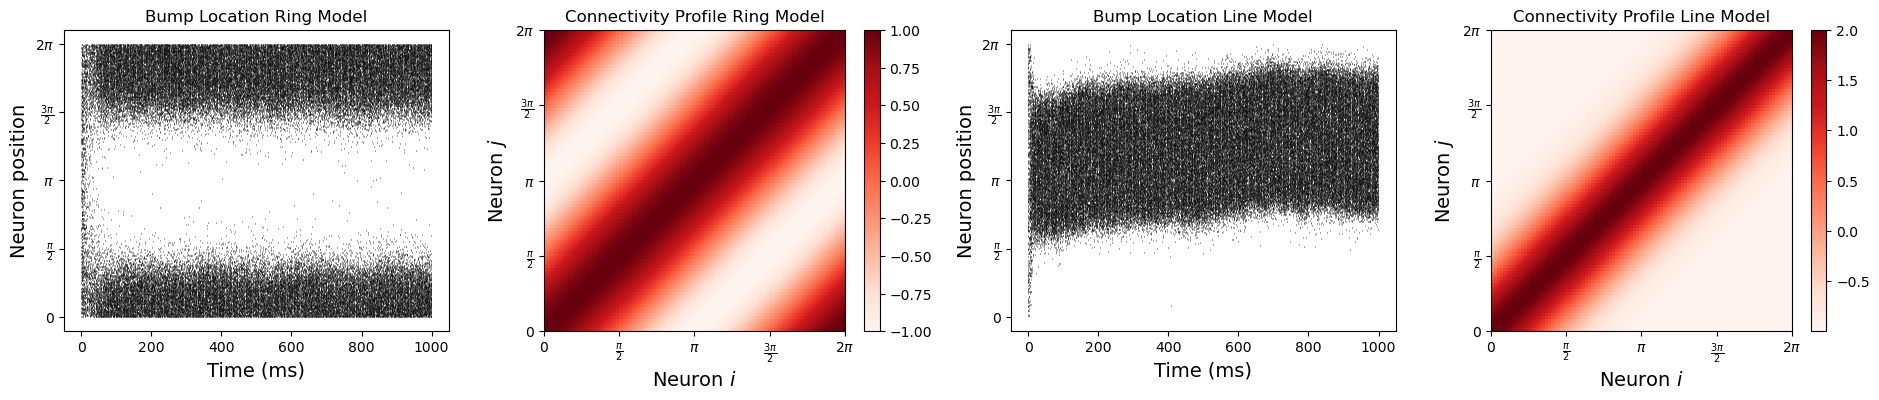

In [130]:
# BUMP LOCATION RING MODEL
fig, ax = plt.subplots(1, 4, figsize=(19,4))

ax[0].set_xlabel('Time (ms)', fontsize=14)
ax[0].set_ylabel('Neuron position', fontsize=14)
ax[0].set_yticks(np.linspace(0,ct.N,5, endpoint=True), ['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])

network = PoissonNeuron()
h_ring, s_ring = network.spike_simulation(input_fct=network.recurrent_interactions_input, initial_voltage=np.random.uniform(0, 1, ct.N))
s_ring = sim.bins_spike(s_ring, 1)
spike_times = [np.where(s_ring.T[i] !=0)[0] for i in range(ct.N)]
ax[0].eventplot(spike_times, orientation='horizontal', color="black", linewidth=0.5)
ax[0].set_title('Bump Location Ring Model')

# CONNECTIVITY PROFILE RING MODEL
phase = 0
x = np.linspace(0, 2*np.pi, 100).reshape(-1, 1)
w = np.cos(x-phase-x.T)

im=ax[1].imshow(w, cmap='Reds', extent=[0, 2*np.pi, 0, 2*np.pi], origin='lower', vmin=-1, vmax=1)
ax[1].set_xlabel(r'Neuron $i$', fontsize=14)
ax[1].set_ylabel(r'Neuron $j$', fontsize=14)
ax[1].set_title('Connectivity Profile Ring Model')
ax[1].set_xticks(np.linspace(0,2*np.pi,5, endpoint=True), ['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
ax[1].set_yticks(np.linspace(0,2*np.pi,5, endpoint=True), ['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
cbar = fig.colorbar(im, ax=ax[1])

# BUMP LOCATION GAUSSIAN TURNING CURVE
ax[2].set_xlabel('Time (ms)', fontsize=14)
ax[2].set_ylabel('Neuron position', fontsize=14)
ax[2].set_yticks(np.linspace(0,ct.N,5, endpoint=True), ['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])

network = PoissonNeuron(J0=-1, J1=3, sigma_w=1)
h_line, s_line = network.spike_simulation(input_fct=network.line_input, initial_voltage=np.random.uniform(0, 1, ct.N))

s_line = sim.bins_spike(s_line, 1)
spike_times = [np.where(s_line.T[i] !=0)[0] for i in range(ct.N)]
ax[2].eventplot(spike_times, orientation='horizontal', color="black", linewidth=0.5)
ax[2].set_title('Bump Location Line Model')

# CONNECTIVITY PROFILE RING MODEL
J0, J1, sigma = -1, 3, 1
phase = 0
x = np.linspace(0, 2*np.pi, 100).reshape(-1, 1)
w = J0 + J1 * np.exp((-(x-x.T)**2)/(2*sigma**2))

im=ax[3].imshow(w, cmap='Reds', extent=[0, 2*np.pi, 0, 2*np.pi], origin='lower')
ax[3].set_xlabel(r'Neuron $i$', fontsize=14)
ax[3].set_ylabel(r'Neuron $j$', fontsize=14)
ax[3].set_title('Connectivity Profile Line Model')
ax[3].set_xticks(np.linspace(0,2*np.pi,5, endpoint=True), ['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])
ax[3].set_yticks(np.linspace(0,2*np.pi,5, endpoint=True), ['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'])

# Add colorbar
cbar = fig.colorbar(im, ax=ax[3])

plt.tight_layout()
plt.savefig('./plots/1_6.png', dpi=600)
plt.show()
